# Diagramma di Hubble e modello cosmologico standard

## Introduzione

In questo progetto viene analizzato il modello cosmologico standard "$\Lambda$-cold-dark-matter" nell'ipotesi di universo piatto $\Omega_{k}=0$. La funzione di Hubble è:

$$ H(z) = H_{0}\sqrt{\Omega_{\Lambda} + \Omega_{m} (z + 1 )^{3} + \Omega_{k} (z + 1 )^{2} }$$
$$\Omega_{\Lambda} + \Omega_{m} + \Omega_{k} =1$$

Con  $H_{0}$, $\Omega_{\Lambda}$ ed $\Omega_{m}$ parametri che rappresentano rispettivamente la costante di Hubble, la densità di energia e materia oscura e la densità di materia conosciuta.

Esso fornisce una dettagliata descrizione dello stato attuale dell'Universo e dei processi evolutivi che l'hanno determinato. Tale modello è stato introdotto quando, studiando le supernovae $Ia$ ad alto redishift si osservò che l'universo è in espansione ad una velocità crescente. In esso viene introdotta la costante cosmologica $\Omega_{\Lambda}$ come elemento fondamentale che provoca l'accelerazione, ad essa è associata l'energia oscura.

Dal modello è possibile ricavare la relazione per il modulo di distanza:

$$ \mu (z) = 25 + 5\log_{10}{ D_{L}(z)} $$

- dove $z$ è il redshift, ovvero lo spostamento della lunghezza d'onda, della luce emessa dall'oggetto astronomico osservato, verso il rosso. Esso è causato dell'espansione dell'universo;

- $D_{l}(z)$ rappresenta la distanza di luminosità, essa viene definita operativamente attraverso la misura del flusso di energia $ f = \frac{L}{4\pi DL^{2}} $  , ovvero il raggio della superficie sferica su cui si distribuisce la luce emessa dalla supernova.
A causa dell'effetto redshift si ha che il flusso dipende da $z$ , $ f = \frac{L}{4\pi Dc^{2}(1+z)^{2}} $. 
Di conseguenza si ottiene che $D_{L} = D_{c}(1 + z)$ dove $D_{c}$ è detta distanza comovente. Nel caso di un universo piatto la distanza comovente è pari a: 

$$ Dc (z) = \frac{c}{H_{0}} \int_{0}^{z}{E(z)} $$
     dove $ E(z) = \frac{H(z)}{H_{0}} $ è il parametro di Hubble adimensionale.

Il modulo di distanza $\mu (z)$ è definito dalla differenza tra la magnitudine assoluta $M$ e apparente $m$: 
$$\mu(z) = M-m$$

La magnitudine apparente m è la misura del flusso di un oggetto celeste confrontato con un oggetto di riferimento.

$$ m - m_{0} = -2.5 \log_{10}{\frac{f}{f_{0}}} +  cost $$

La magnitudine assoluta $M$, invece, viene misurata ponendo che gli oggetti si trovino ad una distanza fissa di 10pc, per cui è indipendente dalla distanza.

$$ M - M_{0} = -2.5 \log_{10}{L} +  cost $$

Secondo la legge di Hubble, per piccole distanze esiste una relazione lineare tra il redshift e il modulo di distanza. $H_{0}$ è la costante di Hubble, ed essa rappresenta come scala la velocità di espansione dell'universo al variare della distanza degli oggetti astronomici osservati.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc  
from scipy.optimize import curve_fit
from iminuit.cost import LeastSquares
from iminuit import Minuit
from scipy.stats import chi2
from astropy.cosmology import WMAP9
from astropy.cosmology import FlatLambdaCDM

Di seguito sono riportati la tabella e il grafico dei dati sperimentali:

In [2]:
df = pd.read_csv('dati.csv')
df = df[['redshift', 'mod_dist', 'mod_dist_err']].sort_values('redshift', ascending = True)
df
#ordina valore redshift

,redshift,mod_dist,mod_dist_err
50,0.015000,34.163504,0.161453
148,0.015000,34.111411,0.213389
132,0.015000,34.379773,0.217349
159,0.015027,33.950192,0.178117
139,0.015100,34.525875,0.213682
...,...,...,...
557,1.340000,45.067506,0.275015
570,1.350000,44.827065,0.185705
533,1.370000,45.049713,0.262748
537,1.390000,44.876234,0.250632


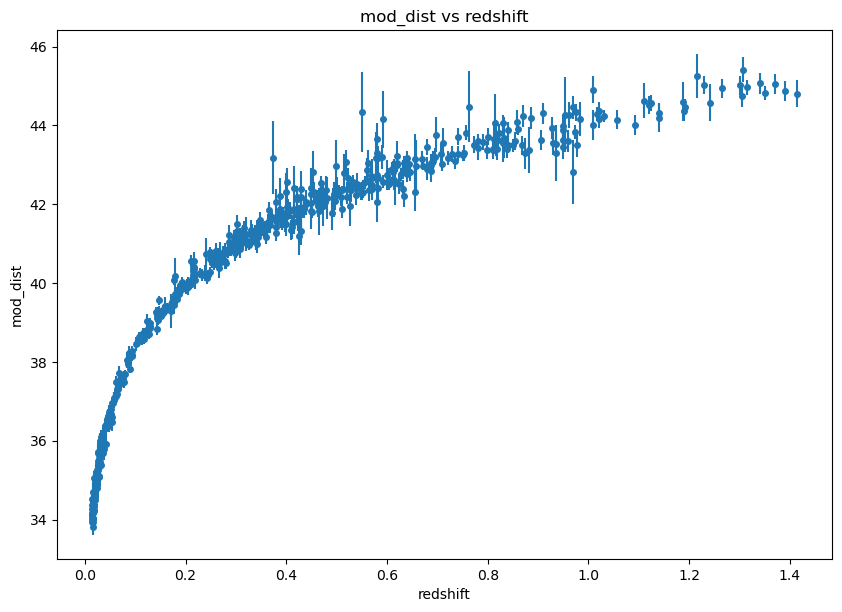

In [3]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=100)
plt.title('mod_dist vs redshift')
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.show()

## Analisi dei dati

Per ovviare alla risoluzione numerica dell'integrale , al fine di ottenere la forma analitica della distanza di luminosità, si può dimostrare che quest'ultima è soluzione di una particolare equazione differenziale del secondo ordine. Vale la seguente relazione:

$D_{L}(z) = \frac{c}{H_{0}} \frac{2(1+z)}{\sqrt{\Omega_{m}}} {2F_{1}[\frac{1}{6};\frac{1}{2};\frac{7}{6};\frac{\Omega_{m}-1}{\Omega_{m}}] } - \frac{1}{\sqrt{1+z}}{2F_{1}[\frac{1}{6};\frac{1}{2};\frac{7}{6};\frac{\Omega_{m}-1}{\Omega_{m}}(1+z)^{-3}] }$

dove ${2}F_{1}$ è una funzione ipergeometrica di seconda specie

Per semplificare la notazione i parametri sono stati rinominati:
- A è la costante di Hubble
- B è il parametro  $\Omega_{m}$
- C è il parametro $\Omega_{\Lambda}$
- z è il redshift.

In [4]:
def geom_1(B):
    return sc.hyp2f1(1/6,1/2,7/6, (B - 1)/B)
def geom_2(B,z):
    return sc.hyp2f1(1/6,1/2,7/6, ((B - 1)/B) * (1 + z) ** (-3))

In [5]:
# velocità della luce in km/s:
c = 299792.458

In [6]:
#Luminosità Dl(z):
def Dl(z,A,B):
     return ((c/A) * (2 * (1 + z))/np.sqrt(B)) * (geom_1(B) - 1/np.sqrt(1 + z) * geom_2(B,z))

Per stimare i parametri è stato effettuato un fit ai minimi quadrati.
Si è adoperata la funzione di ```SciPy``` [```curve_fit```]

In [7]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [8]:
xdata = pd.Series(df.redshift).values
ydata = pd.Series(df.mod_dist).values
sigmas = pd.Series(df.mod_dist_err).values

In [9]:
model2 = np.vectorize(model)

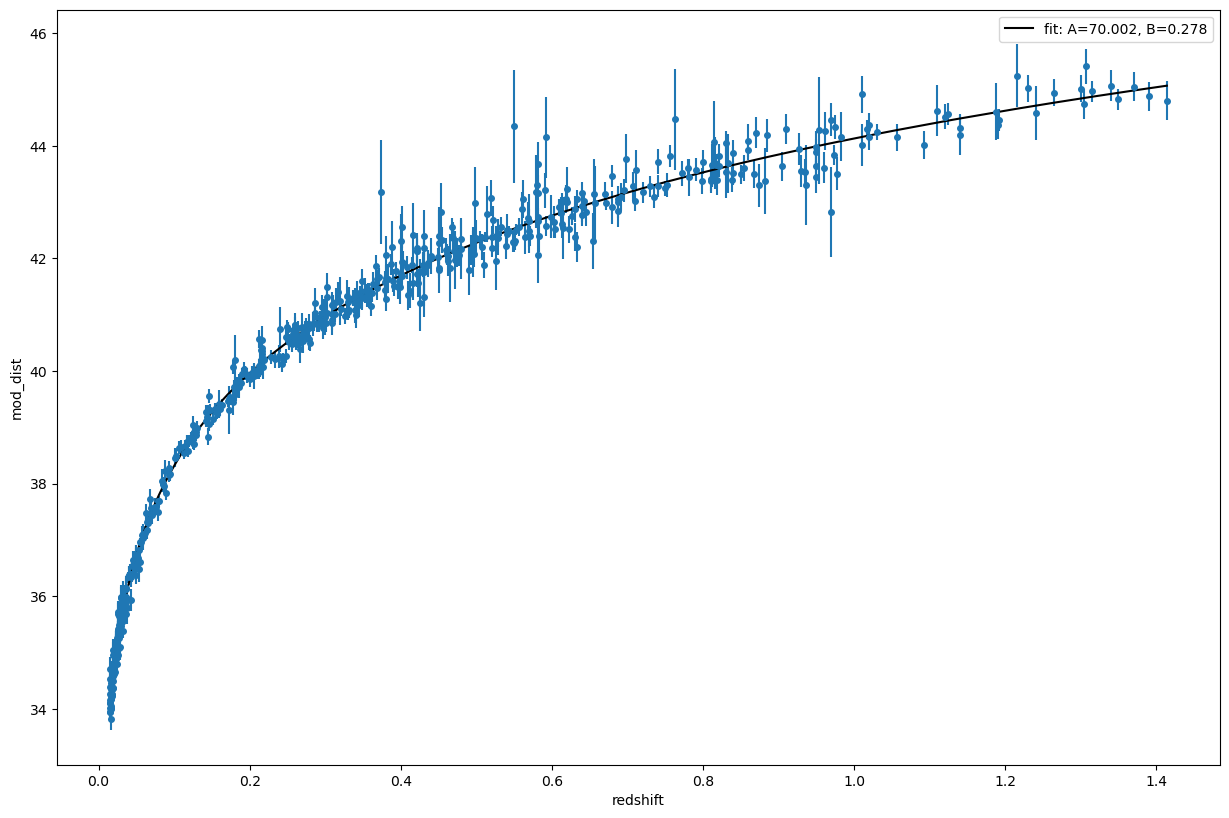

In [10]:
popt, pcov = curve_fit(model2, xdata, ydata, p0=[10,0.5], sigma=sigmas, absolute_sigma=True)

fig, ax = plt.subplots(figsize=(15, 10), dpi=100)
ax.errorbar(df.redshift, df.mod_dist, xerr = 0, yerr=df.mod_dist_err, marker='o', markersize=4, linestyle='')
ax.set_xlabel('redshift')
ax.set_ylabel('mod_dist')
plt.plot(xdata, model2(xdata, *popt), 'r-', label='fit: A={:5.3f}, B={:5.3f}'.format(*popt),color = 'black')
plt.legend()
plt.show()

Seguono i parametri ricavati dal fit:

In [11]:
print('curve fit')
print()
print(popt)
print()
print(pcov)         
print()
print("A = {:.3f}+/-{:.3f}".format(popt[0],np.sqrt(pcov[0,0])))
print("B = {:.3f}+/-{:.3f}".format(popt[1],np.sqrt(pcov[1,1])))
print("Ricordando che B+C=1")
C = 1 - 0.278
print("C = ",C , "± 0.019")

curve fit

[70.00240471  0.27761279]

[[ 0.11675664 -0.00490017]
 [-0.00490017  0.00037944]]

A = 70.002+/-0.342
B = 0.278+/-0.019
Ricordando che B+C=1
C =  0.722 ± 0.019


E' possibile calcolare per ogni coppia di punti (```redshift,mod_dist```) lo scarto quadratico tra il valore sperimentale e quello teorico:

$$ D^{2} =\sum_{i=1}^N (y_{i}^{teo}-y_{i}^{exp})^{2} = \sum_{i=1}^N(model(z,A,B) - y_{i}^{exp})^{2} $$

il fit è stato trovato minimizzando i parametri A e B fino a che $D^{2}$ raggiungesse il minimo assoluto.
Trovati i parametri di best fit è possibile risalire alla stima dell'errore $\sigma_{y,fit}$.

$$\sigma_{y,fit}^{2}=\frac{\sum_{i=1}^N(model(z,A,B) - y_{i}^{exp})^{2}}{N-2} = \frac{D^{2}}{N-2}$$

$N - 2$ è il grado di libertà che caratterizza il fit, esso è dato dalla differenza del numero di dati sperimentali e il numero di parametri da stimare. 

Segue il grafico dei residui calcolati attraverso la seguente formula $\sum_{i=1}^N \frac{(y_{i}^{teo}-y_{i}^{exp})}{\sigma_{y_{i}}} $ dal quale è possibile osservare quanto i punti sperimentali si discostano dal fit.

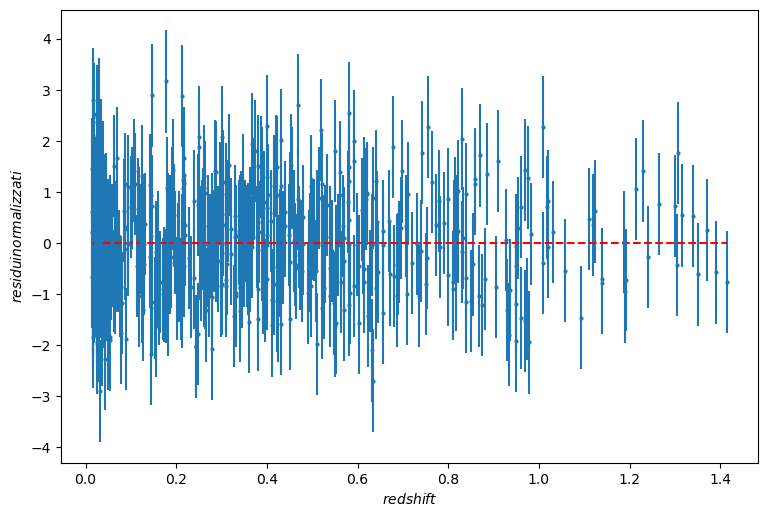

In [12]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.002, 0.278))/df.mod_dist_err), xerr = 0, yerr= 1, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residui normalizzati$')
plt.show()

Il fit è corretto se risulta che $ \sigma_{y,fit}^{2}$ è confrontabile con $\sigma_{y_{i}}^{2}$, segue quindi il calcolo del $\chi ^{2}$ normalizzato:



$\chi^{2} = \sum_{i=1}^N (\frac{y_{i}^{teo}-y_{i}^{exp}}{\sigma_{y_{i}}})^{2} = (N-2) \sum_{i=1}^N \frac{\sigma_{y_{i},fit}} {\sigma_{y_{i}}}$



$\chi^{2}_{norm} = \frac{\chi^{2}}{N-2} $

In [13]:
chi = 0
for i in range(580):
    chi += ((df.mod_dist[i] - model2(df.redshift[i], 70.002, 0.278))/df.mod_dist_err[i])**2
       
chi_norm = chi / (580 - 2)
print("chi_2_norm =", chi_norm)

chi_2_norm = 0.9727117935136316


Data la seguente distribuzione del $\chi^{2}$ per il numero di gradi di libertà del sistema:

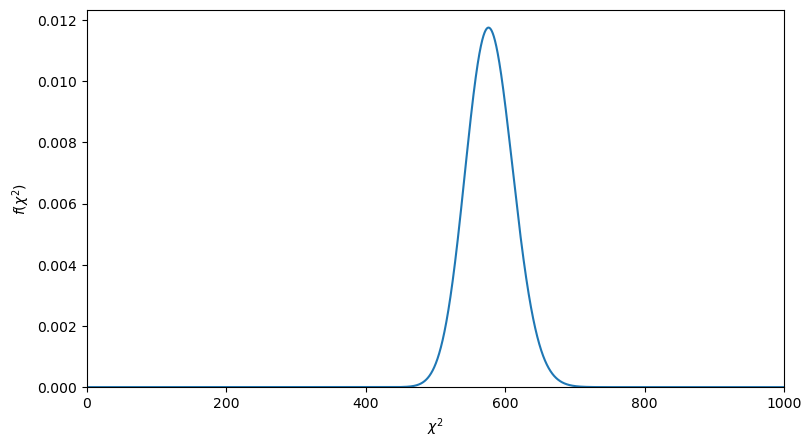

In [32]:
plt.figure(figsize=(9,5),dpi=100)
step = 0.01
xmin,xmax = 0,1000
x = np.arange(xmin, xmax+step, step)
y = chi2.pdf(x, 578)
plt.plot(x, y)
plt.xlim(0, 1000)
plt.ylim(bottom=0)
plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2)$')
plt.show()

E' stato calcolato il p-value $p = 1- F(\chi^2_{\mathrm{obs}};N-2)$, per verificare la validità dell'ipotesi per cui gli errori seguono un andamento gaussiano. A tale scopo, è stata trovata la cumulativa della distribuzione del $\chi ^{2}$, $F(\chi^2_{\mathrm{obs}};N-2)$.

In [14]:
y = chi2.cdf(chi, 578)

In [15]:
p_value = 1 - y
print('p_value =', p_value)

p_value = 0.673115789543796


Osserviamo che il $\chi^{2}_{norm}$ è circa pari a 1. Quindi si può concludere che la qualità fit è buona in quanto $\sigma_{fit}^{2} \approx \sigma_{y}^{2}$, e le ipotesi fatte per l'analisi statistica sono corrette in quanto il p-value è $\approx$ 0.67. Ciò significa che la probabilità che gli errori siano di tipo gaussiano supera il 60%.

Un metodo alternativo a [```curve_fit```], più utilizzato in fisica in quanto insuperato per una serie di problemi di minimizzazione, è [```minuit```]. È stato effetuato un fit anche con questo pacchetto.

In [16]:
def model(z, A, B):
    return 25 + 5 * np.log10(Dl(z,A,B))

In [17]:
least_squares = LeastSquares(df.redshift, df.mod_dist, df.mod_dist_err, model)

In [18]:
m = Minuit(least_squares, A = 70, B = 0.2)

I parametri risultano essere in questo caso:

In [19]:
m.minos()

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   70.00   │   0.31    │   -0.31    │    0.31    │         │         │       │
│ 1 │ B    │   0.200   │   0.015   │   -0.015   │   0.015    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.31    │  -0.015   │   0.015   │
│  Valid   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   True    │   True    │   True    │   True    │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │   0.0963 -0.00315 │
│ B │ -0.00315 0.000227 │
└───┴───────────────────┘

Con minuit è anche possibile ricavare la matrice delle covarianze e il $\chi^{2}$

In [20]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 562.2 (chi2/ndof = 1.0)    │              Nfcn = 94               │
│ EDM = 1.76e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   70.00   │   0.34    │   -0.31    │    0.31    │         │         │       │
│ 1 │ B    │   0.278   │   0.019   │   -0.015   │   0.015    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           A           │           B           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.31   │   0.31    │  -0.015   │   0.015   │
│  Valid   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   True    │   True    │   True    │   True    │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        A        B │
├───┼───────────────────┤
│ A │    0.115 -0.00478 │
│ B │ -0.00478 0.000373 │
└───┴───────────────────┘

Come si può vedere da quest'ultima tabella il $\chi^{2}$ vale:

In [21]:
chi_2 = m.fval
print("chi_2 =", chi_2)

chi_2 = 562.2266263461038


Di conseguenza è stato ricavato il $\chi^{2}$ normalizzato

In [22]:
chi_2_norm = m.fval / (len(xdata) - m.nfit)
print("chi_2_norm=", chi_2_norm)

chi_2_norm= 0.9727104262043318


Quest'ultimo valore è confronabile con quello ottenuto da [```curve fit```]

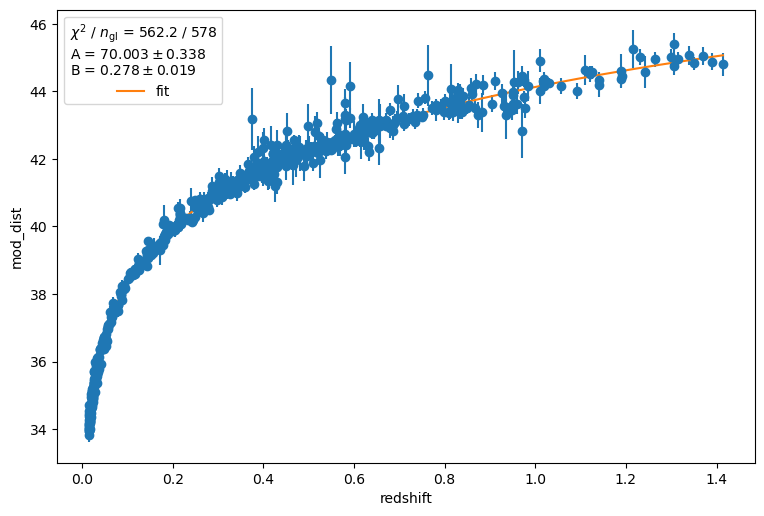

In [23]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(xdata, ydata,sigmas, fmt="o")
data_y_f = model(xdata, 70.01,0.277)
plt.plot(xdata, data_y_f, label="fit")
plt.xlabel('redshift')
plt.ylabel('mod_dist')
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{gl}}$ = {m.fval:.1f} / {len(xdata) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.show()

grafico dei residui:

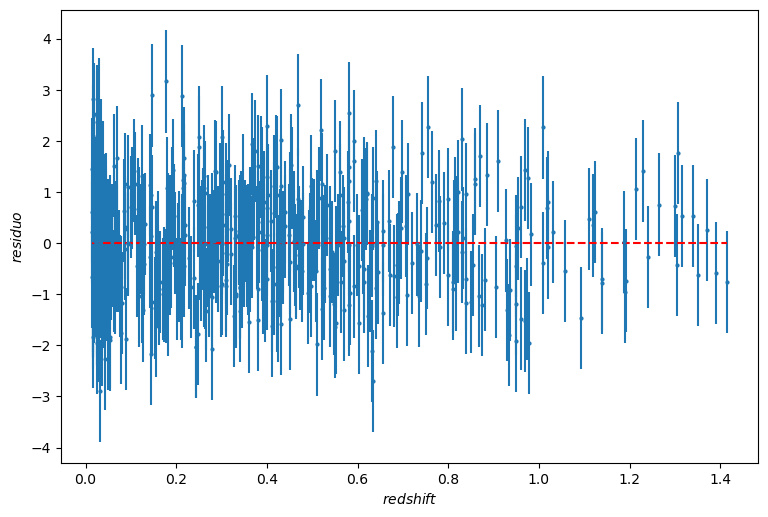

In [24]:
plt.figure(figsize=(9,6), dpi=100)
ax1=plt.subplot()
ax1.errorbar(df.redshift, ((df.mod_dist - model2(df.redshift, 70.01, 0.277))/df.mod_dist_err), xerr = 0, yerr=1, fmt="o", markersize=2)
ax1.plot(df.redshift, np.zeros(580), color = 'r', linestyle = '--' )
ax1.set_xlabel(r'$redshift$ ')
ax1.set_ylabel('$residuo$')
plt.show()

Sono stati, infine, analizzati i contorni di confidenza per i due parametri stimati $H_{0}$ e $\Omega_{m}$, con i contenuti probabilistici al 68%, 90% e 99% .

Infatti, poiché le grandezze fisiche misurate sono affette da incertezze casuali che  danno luogo ad una distribuzione Normale, sappiamo che la probabilità di trovare una data misura ad una distanza crescente, in termini di sigma, decresce.  In questo modo, si può osservare graficamente quali coppie di parametri non è possibile ottenere dall’analisi del fenomeno. Si può dire che il valore centrale di queste curve è il valore di best fit.

Definita la correlazione, gli elementi sull'antidiagonale sono i coefficienti di correlazione tra i parametri

In [25]:
m.covariance.correlation()

,A,B
A,1,-0.732
B,-0.732,1


poichè questi ultimi sono in modulo compresi tra ```[0.7,1]``` si può affermare che esiste una forte correlazione tra $H_{0}$ e $\Omega_{m}$

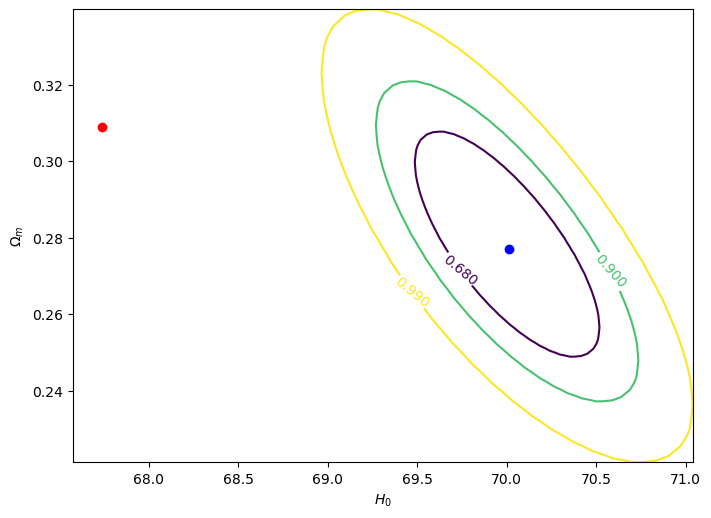

In [26]:
plt.figure(figsize=(8,6), dpi=100)
m.draw_mncontour("A", "B", cl=(0.68, 0.9, 0.99))
plt.scatter(70.01, 0.277, color = 'b')
plt.scatter(67.74, 0.3089, color = 'r')
plt.xlabel("$H_{0}$")
plt.ylabel("$\Omega_{m}$")
plt.show()

In [28]:
nptx, npty = 580, 580
x_p = np.linspace(50, 90, nptx)
y_p = np.linspace(0, 0.6, npty)
x, y = np.meshgrid(x_p, y_p)

least_squares = LeastSquares(x_p, y_p, df.mod_dist_err, model2)
m = Minuit(least_squares, z, A, B)

f = lambda A, B: np.vectorize(m)(A, B)

z = f(x, y)
figure, ax = plt.subplots(figsize=(9,6), dpi=100)
col = ax.pcolormesh(x, y, z, cmap='coolwarm', vmin=0, vmax=8, shading='auto')
con = ax.contour(x, y, z, np.arange(0, 3.1, 1), colors='black')
ax.scatter([eff_ml], [p0_ml], color='black')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('$-2\log L$ contour')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel(r"$\varepsilon$ (vaccine efficacy)")
ax.set_ylabel('$p_0$')
figure.colorbar(col, label='$-2\log L/L_{\mathrm{max}}$')
plt.show()

NameError: name 'z' is not defined

## Conclusioni

I parametri ottenuti da entrambi i fit risultano compatibili tra loro. Si osserva che il fit del modello nel quale è stato introdotto il parametro $\Omega_{\Lambda}$, per giustificare l'espansione accelerata dell'universo, segue correttamente i dati sperimentali. Pertanto dallo studio della relazione che intercorre tra il Redshift e il modulo di distanza è emerso che l'universo è composto per il $\approx 72\%$ di materia ed energia non conosciuta.